# Análisis de paquetes

In [15]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import import_ipynb
import utilsC as utils

Graficar entropia a medida que llegan paquetes

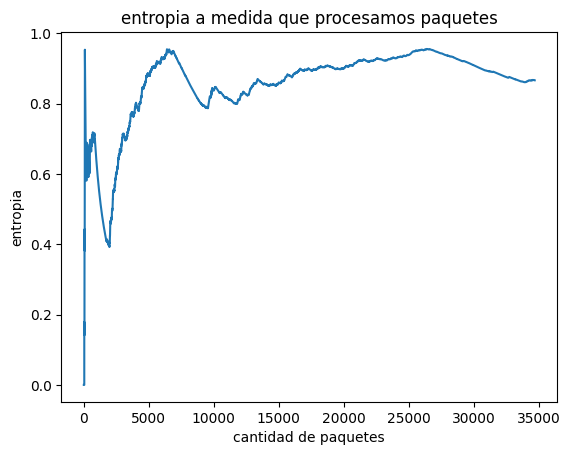

In [16]:
plt.plot(utils.get_entropy("cafeteria/fuente_ent_info_v4.txt"))
plt.title("entropia a medida que procesamos paquetes")
plt.xlabel("cantidad de paquetes")
plt.ylabel("entropia")
plt.show()

Análisis de la fuente final: 
 - Cantidad de Broadcast vs Unicast 

In [17]:
unicast_broadcast_symbol, protocol, percent_unicast, percent_broadcast , symbol_proba= utils.show_source()
print("percent unicast", percent_unicast)
print("percent broadcast", percent_broadcast)

percent unicast 0.98083
percent broadcast 0.01917


- Porcentaje de cada protocolo

In [22]:
percent_per_protocol = {p : 0 for p in np.unique(protocol)}

for s, proba in symbol_proba.items():
    percent_per_protocol[s[0]] += proba

print("porcentaje por protocolo", percent_per_protocol)


porcentaje por protocolo {' 2048': 0.21402000000000002, ' 2054': 0.00297, ' 34525': 0.78301}


- Gráfico de la fuente

In [23]:
symbol_proba

{(' 34525', 'UNICAST'): 0.78301,
 (' 2048', 'UNICAST'): 0.19678,
 (' 2048', 'BROADCAST'): 0.01724,
 (' 2054', 'BROADCAST'): 0.00193,
 (' 2054', 'UNICAST'): 0.00104}

In [24]:


print(unicast)

{' 2048': 0.19678, ' 2054': 0.00104, ' 34525': 0.78301}


[]

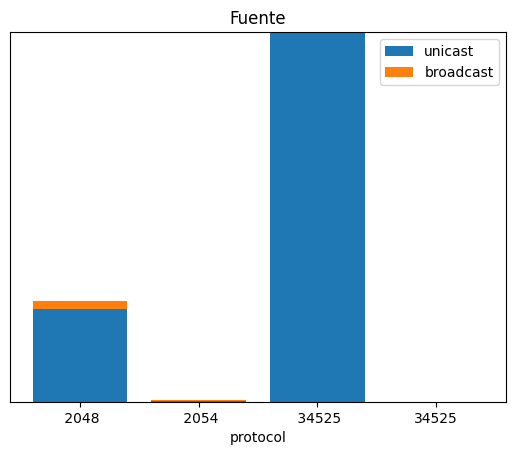

In [29]:
protocols_unique = np.unique(protocol)
unicast = {}
broadcast = {}

for p in protocols_unique:
    if((p, 'UNICAST') in list(symbol_proba.keys())):
        unicast[p] = symbol_proba[(p, 'UNICAST')] 
    else:
        if(not (p, 'BROADCAST') in symbol_proba.keys()):
            unicast[p] = 0
    if((p, 'BROADCAST') in list(symbol_proba.keys())):
        broadcast[p] = symbol_proba[(p, 'BROADCAST')] 
    else:
        if(not (p, 'UNICAST') in symbol_proba.keys()):
            broadcast[p] = 0

fig, ax = plt.subplots()

broadcast["34525"] = 0

ax.bar(unicast.keys(), list(unicast.values()), label = "unicast")
ax.bar(broadcast.keys(), list(broadcast.values()), bottom=list(unicast.values()), label = "broadcast")
plt.xlabel("protocol")
ax.set_title("Fuente")
ax.legend()
ax.set_yticks([])

broadcastRes {'2048': 5.85777, '2054': 9.01569, '34525': 0}


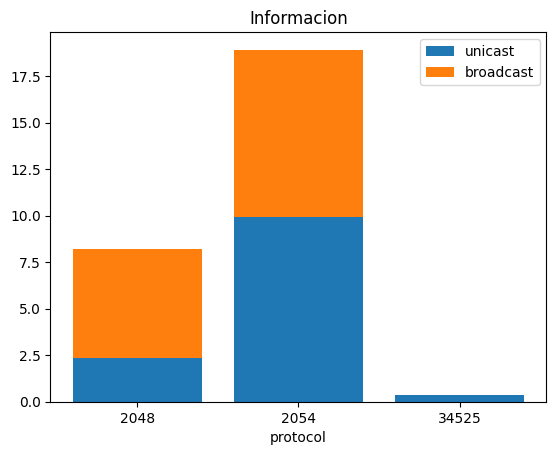

In [ ]:
unicastRes, broadcastRes, sumRes = utils.informationForSymbol()
print("broadcastRes", broadcastRes)
fig, ax = plt.subplots()
ax.bar(unicastRes.keys(), list(unicastRes.values()), label = "unicast")
ax.bar(broadcastRes.keys(), list(broadcastRes.values()), bottom=list(unicastRes.values()), label = "broadcast")
plt.xlabel("protocol")
ax.set_title("Informacion")
ax.legend()